# Fig. S4
Other bacteria

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'/home/brandon/Documents/Code/low-mag-immune')
from low_mag_immune import compute_all_line_dists, compute_all_median_intens, mask_larvae, compute_all_left_right_dists
sys.path.append(r'/home/brandon/Documents/Code/diptericin-paper')
from diptericin_paper_utils import fontsize, dpt, colors
from skimage.io import imread
from scipy.interpolate import interp1d
from glob import glob
import matplotlib as mpl



/home/brandon/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#%matplotlib qt
%matplotlib inline

In [5]:
colors

{'no_inj': [0.8, 0.8, 0.8],
 'mock': [0.4, 0.4, 0.4],
 'e.coli': [0, 0.4, 0],
 'complete': [0, 0.8, 0],
 'bacteria': [0.8, 0, 0.8],
 'dye': array([0.8       , 0.33333333, 0.        ])}

In [6]:
fontsize = 24
def style_axes(ax, fontsize=24):
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
#     plt.tight_layout()
    
    return ax

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [7]:
"""paths to images"""
pret_paths = [r'/media/brandon/Data1/Brandon/fly_immune/bb8/2025_06_03-r4-gal4_uas-his-mcherry_dpt-gfp_pret/green_6hrs']
drs_ef_paths = [r'/media/brandon/Data1/Brandon/fly_immune/bb8/2025_06_12_toll_efaecalis/drs-gfp_6hr']
mtk_ef_paths = [r'/media/brandon/Data1/Brandon/fly_immune/bb8/2025_06_12_toll_efaecalis/mtk-gfp_efaecalis_6hr']

In [8]:
reds = np.linspace(colors['e.coli'][0], colors['bacteria'][0], 6)
greens = np.linspace(colors['e.coli'][1], colors['bacteria'][1], 6)
blues = np.linspace(colors['e.coli'][2], colors['bacteria'][2], 6)

In [4]:
%matplotlib qt

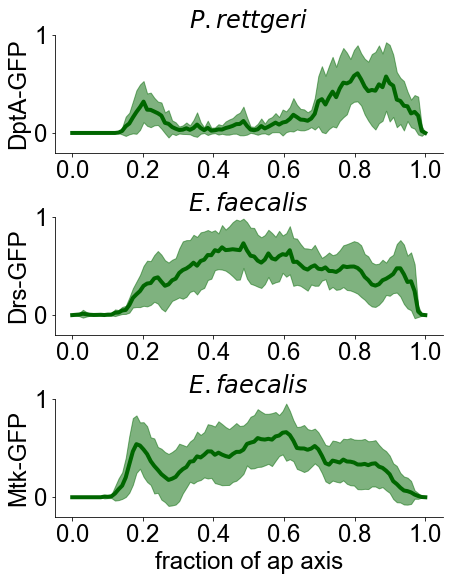

In [13]:
"""stack all plots vertically"""
normalize = True

# green channel dpt
signal_thresh = 350
larvae_thresh = 150
line_dists_pret = compute_all_line_dists(pret_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)

# green channel drs, mtk
signal_thresh = 350
larvae_thresh = 150
line_dists_drs_ef = compute_all_line_dists(drs_ef_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)
line_dists_mtk_ef = compute_all_line_dists(mtk_ef_paths, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)

# ordered by position in signaling cascade
all_line_dists = [line_dists_pret, line_dists_drs_ef, line_dists_mtk_ef]

titles = ['$P. rettgeri$', '$E. faecalis$', '$E. faecalis$']
counter = 0
fig, axs = plt.subplots(3, 1, figsize=(6.63, 8.17))
for i in range(axs.shape[0]):
    line_dists = all_line_dists[counter]
    if len(line_dists) > 0:
        if normalize:
            for k in range(line_dists.shape[0]):
                line_dists[k] = line_dists[k] / np.clip(np.max(line_dists[k]), a_min=1, a_max=np.inf)

        x = np.linspace(0, 1, line_dists.shape[1])
        m = np.mean(line_dists, axis=0)
        s = np.std(line_dists, axis=0) #/ np.sqrt(len(line_dists))
        l = m - s
        u = m + s
        ax = axs[i]
        ax.fill_between(x, l, u, color=colors['e.coli'], alpha=0.5)
        ax.plot(x, m, linewidth=4, color=colors['e.coli'],)
        ax.set_title(f'{titles[counter]}', fontsize=fontsize)

        if counter == 2:
            ax.set_xlabel('fraction of ap axis', fontsize=fontsize)
       
        if counter == 0:
            ax.set_ylabel(f'{dpt}-GFP', fontsize=fontsize)
        if counter == 1:
            ax.set_ylabel('Drs-GFP', fontsize=fontsize)
        if counter == 2:
            ax.set_ylabel('Mtk-GFP', fontsize=fontsize)
       
        ax.set_ylim([-0.2, 1])
        ax = style_axes(ax, fontsize=fontsize)
    counter += 1
fig.tight_layout()

In [21]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/other_bugs_fig/other_bugs_ap_dist_v3.pdf')